# Building fluids models

To use `bluebonnet.fluids` in a project:

In [1]:
import bluebonnet as bb
from bluebonnet.fluids.fluid import Fluid
from bluebonnet.fluids.gas import (
    make_nonhydrocarbon_properties,
    pseudocritical_point_Sutton,
)

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

## Calculate formation volume factors

[Text(0.5, 0, 'Pressure (psi)'),
 Text(0, 0.5, 'b-factor'),
 (0.0, 5249.275),
 (0.0, 1.4545145435916431)]

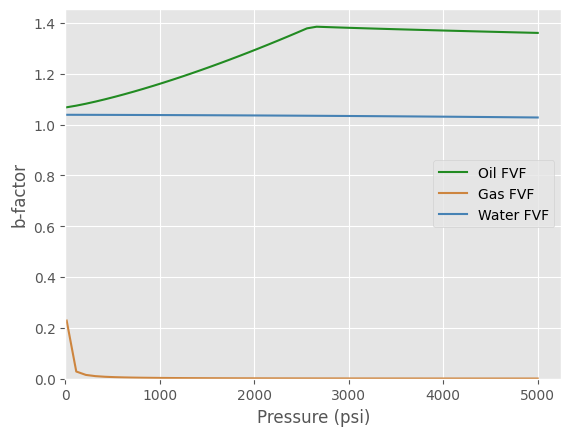

In [2]:
fluid = Fluid(
    200, 35, 0.8, 650
)  # 200 degrees F, 35 degrees API, specific gas gravity: 0.8, 650 scf/bbl initial reservoir gor
non_hydrocarbon_properties = make_nonhydrocarbon_properties(
    0.05, 0.01, 0.04
)  # nitrogen, hydrogen_sulfide, co2
pseudocritical_point = pseudocritical_point_Sutton(
    0.8, non_hydrocarbon_properties, "wet gas"
)  # gas gravity
pressure = np.linspace(14.5, 5_000)
Bo = fluid.oil_FVF(pressure)
Bg = fluid.gas_FVF(pressure, *pseudocritical_point)
Bw = fluid.water_FVF(pressure)

fig, ax = plt.subplots()
ax.plot(pressure, Bo, label="Oil FVF", color="forestgreen")
ax.plot(pressure, Bg, label="Gas FVF", color="peru")
ax.plot(pressure, Bw, label="Water FVF", color="steelblue")
ax.legend(loc="center right")
ax.set(xlabel="Pressure (psi)", ylabel="b-factor", xlim=(0, None), ylim=(0, None))

## Calculate viscosity

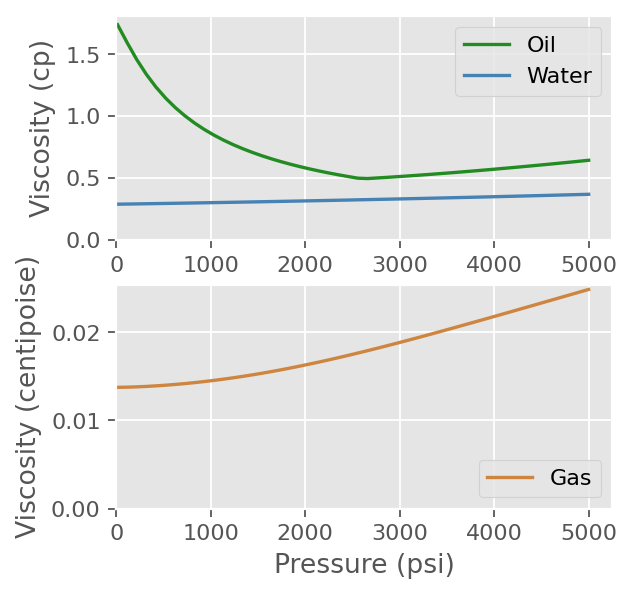

In [3]:
fluid = Fluid(
    200, 35, 0.8, 650
)  # 200 degrees F, 35 degrees API, specific gas gravity: 0.8, 650 scf/bbl initial reservoir gor
non_hydrocarbon_properties = make_nonhydrocarbon_properties(
    0.05, 0.01, 0.04
)  # nitrogen, hydrogen_sulfide, co2
pseudocritical_point = pseudocritical_point_Sutton(
    0.8, non_hydrocarbon_properties, "wet gas"
)  # gas gravity
pressure = np.linspace(14.5, 5_000)
mu_o = fluid.oil_viscosity(pressure)
mu_g = fluid.gas_viscosity(pressure, *pseudocritical_point)
mu_w = fluid.water_viscosity(pressure)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 4), dpi=160)
ax1.plot(pressure, mu_o, label="Oil", color="forestgreen")
ax1.plot(pressure, mu_w, label="Water", color="steelblue")
ax2.plot(pressure, mu_g, label="Gas", color="peru")
ax1.legend(loc="upper right")
ax1.set(ylabel="Viscosity (cp)", xlim=(0, None), ylim=(0, None))
ax2.legend(loc="lower right")
ax2.set(
    xlabel="Pressure (psi)",
    ylabel="Viscosity (centipoise)",
    xlim=(0, None),
    ylim=(0, None),
);